# Pitchfork Reviews

Pitchfork is a __[website](http://pitchfork.com)__ dedicated to music and one of its pages provides reviews of different albums. These reviews can be submitted by an employee or a contributor. Below is a snapshot of the data, which can be downloaded in its entirety __[here](https://www.kaggle.com/bcyphers/pitchfork-reviews)__.

I thought I would take a look at one of my favorite genres of music, experimental. I want to do a textual analysis of the content of the reviews for this genre. I will take a look at the top words used in these reviews. I will also do a sentiment analysis of the reviews as well as utilize tf_idf. And hopefully come up with some fun plots.

In [2]:
library(dplyr)
library(tidytext)
library(readr)
library(stringr)
library(tidyr)
library(ggplot2)
library(ggthemes)
library(tidyverse)
library(readr)
library(stringi)
library(tibble)
library(wordcloud)

In [3]:
pitchfork <- read.csv("/dsa/home/craddocka/DSA-8630_craddocka/modules/module8/reviews.csv",header=TRUE,sep=",",stringsAsFactors=F, encoding = "UTF-8")

In [4]:
glimpse(pitchfork)

Observations: 18,388
Variables: 19
$ reviewid       <int> 22703, 22721, 22659, 22661, 22725, 22722, 22704, 226...
$ Unnamed..0     <int> 0, 1, 2, 4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19...
$ title          <chr> "mezzanine", "prelapsarian", "all of them naturals",...
$ url            <chr> "http://pitchfork.com/reviews/albums/22703-mezzanine...
$ score          <chr> "9.3", "7.9", "7.3", "9", "8.1", "7.4", "7.1", "7", ...
$ best_new_music <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...
$ author         <chr> "nate patrin", "zoe camp", "david glickman", "jenn p...
$ author_type    <chr> "contributor", "contributor", "contributor", "associ...
$ pub_date       <chr> "2017-01-08", "2017-01-07", "2017-01-07", "2017-01-0...
$ pub_weekday    <chr> "6", "5", "5", "4", "4", "3", "3", "3", "2", "2", "2...
$ pub_day        <int> 8, 7, 7, 6, 6, 5, 5, 5, 4, 4, 4, 3, 3, 2, 2, 2, 2, 3...
$ pub_month      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
$ pub_year       

I noticed some odd endoding characters. I tried a few different methods to remove, but was still left with the rows below after using grep to narrow them down.

In [5]:
grep("<*>", pitchfork$content)

[1]    42   276   791  2742  3652  3931  4027  4377  4483  4998  5030  5415
[13]  5528  7074  7263  8442  8750  9156  9307 10660 11005 11110 11202 12335
[25] 12629 12645 13294 13355 13375 13708 13872 14856 15144 15198 15729 15762
[37] 16289 16303 16309 16743 16973 17721 17987 18232 18292

gsub came in handy here.

In [6]:
pitchfork$content <- gsub("[^[:alnum:][:blank:]?&/\\-]", "", pitchfork$content)

In [7]:
glimpse(pitchfork)

Observations: 18,388
Variables: 19
$ reviewid       <int> 22703, 22721, 22659, 22661, 22725, 22722, 22704, 226...
$ Unnamed..0     <int> 0, 1, 2, 4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19...
$ title          <chr> "mezzanine", "prelapsarian", "all of them naturals",...
$ url            <chr> "http://pitchfork.com/reviews/albums/22703-mezzanine...
$ score          <chr> "9.3", "7.9", "7.3", "9", "8.1", "7.4", "7.1", "7", ...
$ best_new_music <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...
$ author         <chr> "nate patrin", "zoe camp", "david glickman", "jenn p...
$ author_type    <chr> "contributor", "contributor", "contributor", "associ...
$ pub_date       <chr> "2017-01-08", "2017-01-07", "2017-01-07", "2017-01-0...
$ pub_weekday    <chr> "6", "5", "5", "4", "4", "3", "3", "3", "2", "2", "2...
$ pub_day        <int> 8, 7, 7, 6, 6, 5, 5, 5, 4, 4, 4, 3, 3, 2, 2, 2, 2, 3...
$ pub_month      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
$ pub_year       

In [8]:
pitchfork[13708,]

,reviewid,Unnamed..0,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid.1,content,genre,label,artist,X
13708,4164,20134,we are monster,http://pitchfork.com/reviews/albums/4164-we-are-monster/,8.4,1,nick sylvester,contributor,2005-06-14,1,14,6,2005,4164,The classics kid in me craves noble grandeur-- craft-happy shit with more than meets the rods and cones less is always more except with clothes suggestive-seductive vs the once-off gunfuck Full-on body musics great sure but so is porno and with that shit Id much rather wax new flesh than drag my stylus off the same old 10-second loop Same time Intelligent Body Musics as much a nightmare as Intelligent Anal both a prefab excuse for pleasure-lack So were stuck in this immediacybetter rut when really the best stuff cross-genre-- cross-platform cross-media-- has instant funk but with enough tricks for prolonged appeal Liking We Are Monster is easy Isole arent bangers but they groove hard enough melodies are pretty but most times we have to look for them no lead vox or riff jihad per se Tracks arent afraid to be songs Face B and songs arent afraid to be tracks Jelly Baby / Fish Everythings pleasant in other words non-threatening like the cutesy-est Morr Music lullaby but physical enough that you could get away with some great normal-person dancing There are guitar sounds on a few tracks too if thats important Today sounds like Do You Realize? and traceable horizontal A--B trajectory in songs with actual movements and quantifiable progress No need for all the its about size its about expansion apologies people make for their favorite loops As for loving this record-- letting it problematize itself with spins and learning to let it offend-- well We Are Monster has the depth if you have the time Yep heres a fun record thats a work-for-it in-the-details record too Behind the choked-vocals groove of say Enrico are countless micro-surprises check how the kicks break down differently each turnaround or how the downbeat finally drops deceptively mid-bar instead of on the loops head structured flips with chess-like anticipation the guitar-like scratches function percussively at first their color stuck in overtones until the song needs them in full and avalanching momentum not from Isole stuffing ideas half-baked but from letting the seeds of lines grow branch out and tangle Not sure we can talk of Golden Age IDM or even Golden Age Techno yet but something like the Copeland-does-Glam gem Schrapnell seems so effortless breathes so carefree years from now crits might accuse it of sounding timeless-- maybe even of being so The rest of the tracks have their own self-revealing logic obeying the beat but never in dependency to it Honestly you could drop the drum sounds off Madchen mit Hase and the song would still kill a floor the rhythms of its composite parts boasting good spine serving the melody before decorating the dancefloor No gestures incidental the simplest blip plays for both a greater purpose and its own passing punchline Even the second-trackiest number Do Re Mi fronts a perplexing guitar jingle so it can alley-oop with drones of the same progression and a goofy italo-disco melody of 180-degree mood change then the polar-opposite timbre These songs are well-poised and well-developed and terrifyingly autonomous-- so much so Im afraid theyre no longer Isoles anymore On that note Yeah while I wish We Are Monster was an Album w/Overarching Concerns and Worldview not just a Bunch Of Sweet Similar-Sounding Stand-Alone Tracks Im also convinced that in fact a worldview is there and probably an exciting one at that I just havent cracked one yet-- or just wont be able to,electronic,playhouse,isole,


I no longer see the same characters when using glimpse. I checked one of the row numbers from my earlier grep.
It looks clean, but just to be sure I'll grep one more time. Looks good.

In [9]:
grep("<*>", pitchfork$content)

integer(0)

In [10]:
word_count <- pitchfork %>%
unnest_tokens(word, content)
head(word_count)

,reviewid,Unnamed..0,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid.1,genre,label,artist,X,word
1,22703,0,mezzanine,http://pitchfork.com/reviews/albums/22703-mezzanine/,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,22703,electronic,virgin,massive attack,,trip
1.1,22703,0,mezzanine,http://pitchfork.com/reviews/albums/22703-mezzanine/,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,22703,electronic,virgin,massive attack,,hop
1.2,22703,0,mezzanine,http://pitchfork.com/reviews/albums/22703-mezzanine/,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,22703,electronic,virgin,massive attack,,eventually
1.3,22703,0,mezzanine,http://pitchfork.com/reviews/albums/22703-mezzanine/,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,22703,electronic,virgin,massive attack,,became
1.4,22703,0,mezzanine,http://pitchfork.com/reviews/albums/22703-mezzanine/,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,22703,electronic,virgin,massive attack,,a
1.5,22703,0,mezzanine,http://pitchfork.com/reviews/albums/22703-mezzanine/,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,22703,electronic,virgin,massive attack,,90s


First step, tokenize. Then pull in the standard stop words and then join.

In [11]:
data(stop_words)

In [12]:
word_count <- word_count %>%
anti_join(stop_words)

Joining, by = "word"


In [13]:
word_count %>%
count(word, sort = TRUE) %>%
head(20)

word,n
album,37181
music,34401
songs,29813
band,24196
sound,23666
song,23121
time,20137
rock,19210
record,18190
pop,17646


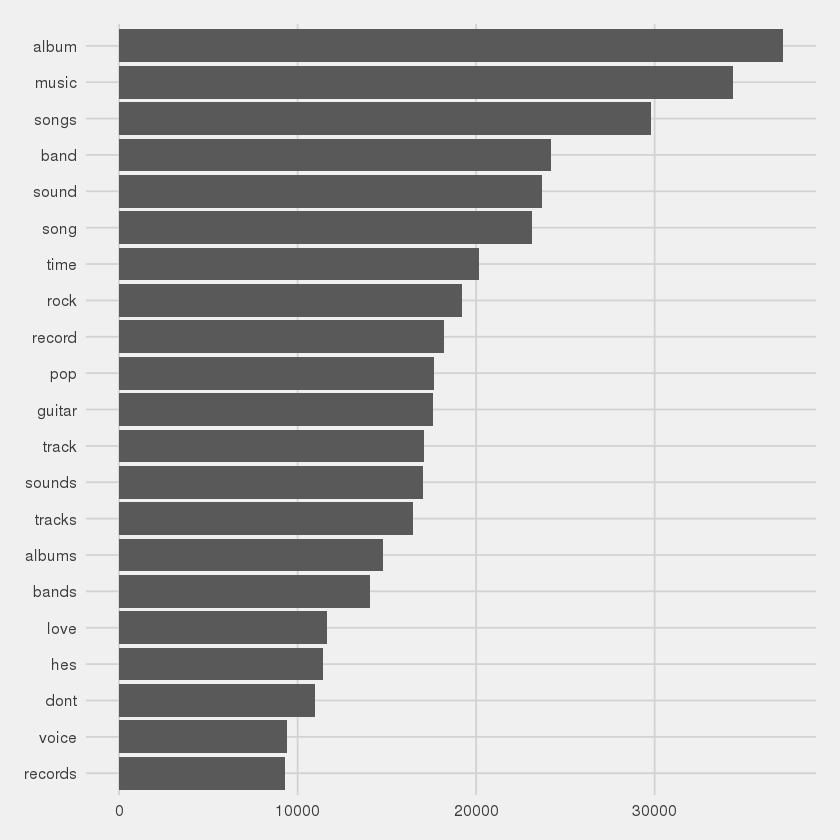

In [14]:
word_count %>%
count(word, sort = TRUE) %>%
filter(n > 9000) %>%
mutate(word = reorder(word, n)) %>%
ggplot(aes(word, n)) +
geom_col() +
xlab(NULL) +
coord_flip() +
theme_fivethirtyeight()

Many of these terms look to be pretty common words you would expect to find in music reviews in general. Now I want to start looking specifically at the experimental genre.

In [15]:
genre_count <- pitchfork %>%
group_by(genre) %>%
mutate(linenumber = row_number()) %>%
ungroup() %>%
unnest_tokens(word, content)

In [16]:
genre_count <- genre_count %>%
anti_join(stop_words)

Joining, by = "word"


In [17]:
genre_count %>%
filter(genre == "experimental") %>%
count(word, sort = TRUE) %>%
head(20)

word,n
music,2008
album,998
sound,967
sounds,762
time,632
record,526
tracks,503
track,496
guitar,476
songs,446


After removing the standard stop words, I still see many of the common music related words from before. I want to remove those so I created my own batch of stop words to remove.

In [18]:
my_stopwords <- data_frame(word = c(as.character(1:20), "album", "music", "songs", "band","sound","song", "time", "rock", "record", "pop", "guitar", "track", "sounds", "tracks", "albums", "bands", "love","hes", "dont", "voice"))

In [19]:
genre_count2 <- genre_count %>%
anti_join(my_stopwords) %>%
anti_join(stop_words)

Joining, by = "word"
Joining, by = "word"


In [20]:
genre_count2 %>%
filter(genre == "experimental") %>%
count(word, sort = TRUE) %>%
head(20)

word,n
piece,439
noise,417
pieces,342
world,315
sense,313
piano,305
feel,304
records,301
electronic,300
makes,296


That looks a little better. Now to visualize.

In [21]:
exp_count <- genre_count2 %>%
filter(genre == "experimental") %>%
count(word, sort = TRUE) %>%
head(20)

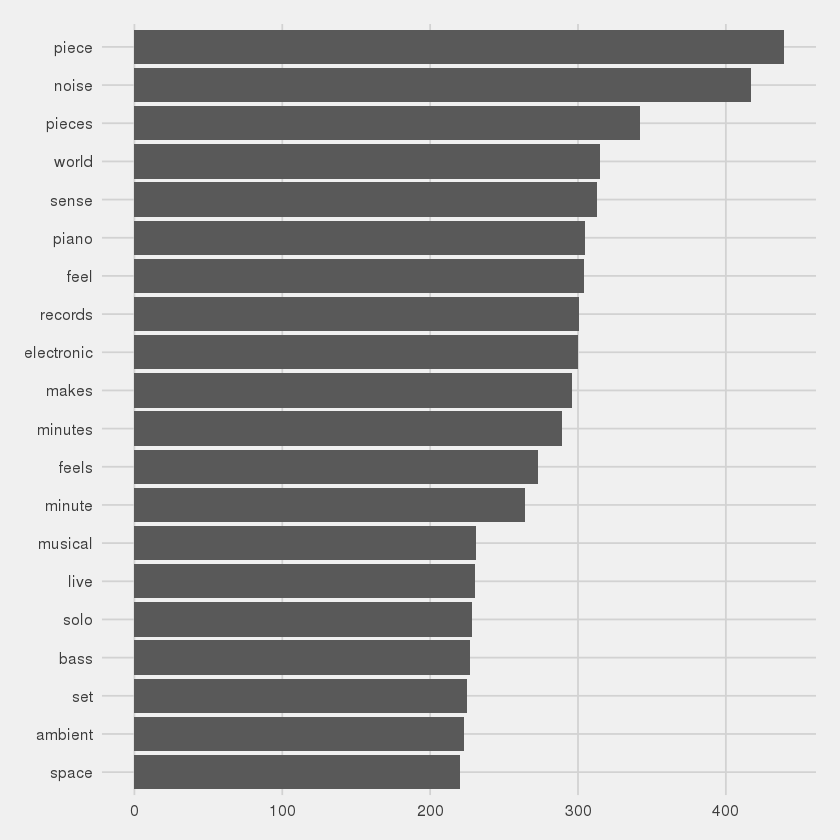

In [22]:
exp_count %>%
ggplot(aes(reorder(word, n), n)) +
geom_col() +
xlab(NULL) +
coord_flip() +
theme_fivethirtyeight()

I'm now seeing terms you might associate more closely with this genre.

In [23]:
exp_sent <- genre_count2 %>%
group_by(genre, word) %>%
filter(genre == "experimental")

In [24]:
glimpse(exp_sent)

Observations: 166,521
Variables: 20
$ reviewid       <int> 22714, 22714, 22714, 22714, 22714, 22714, 22714, 227...
$ Unnamed..0     <int> 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, ...
$ title          <chr> "reflection", "reflection", "reflection", "reflectio...
$ url            <chr> "http://pitchfork.com/reviews/albums/22714-reflectio...
$ score          <chr> "7.7", "7.7", "7.7", "7.7", "7.7", "7.7", "7.7", "7....
$ best_new_music <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ author         <chr> "andy beta", "andy beta", "andy beta", "andy beta", ...
$ author_type    <chr> "contributor", "contributor", "contributor", "contri...
$ pub_date       <chr> "2017-01-04", "2017-01-04", "2017-01-04", "2017-01-0...
$ pub_weekday    <chr> "2", "2", "2", "2", "2", "2", "2", "2", "2", "2", "2...
$ pub_day        <int> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4...
$ pub_month      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
$ pub_year      

Now I want to start a sentiment analysis. I want to compare the bing and nrc lexicons. I'll start with a bird's eye view of each.

In [25]:
sentiment <- exp_sent %>%
inner_join(get_sentiments("nrc")) %>%
count(index = word, sentiment) %>%
spread(sentiment, n, fill = 0) %>%
mutate(sentiment = positive - negative)

Joining, by = "word"


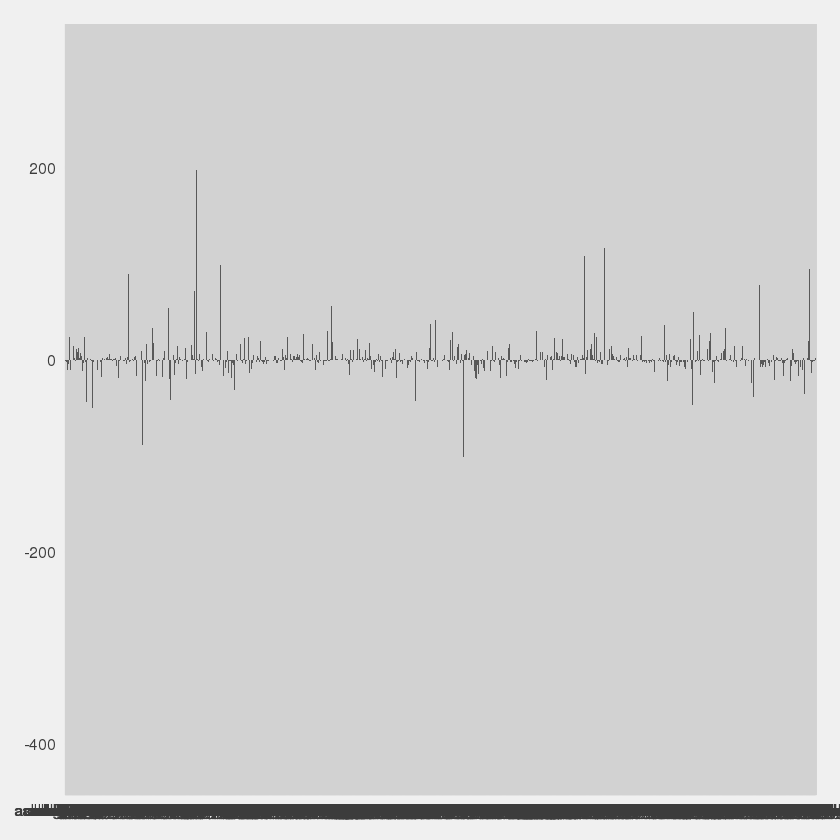

In [26]:
ggplot(sentiment, aes(index, sentiment)) +
geom_col(show.legend = FALSE) +
theme_fivethirtyeight()

In [27]:
sentiment2 <- exp_sent %>%
inner_join(get_sentiments("bing")) %>%
count(index = word, sentiment) %>%
spread(sentiment, n, fill = 0) %>%
mutate(sentiment = positive - negative)

Joining, by = "word"


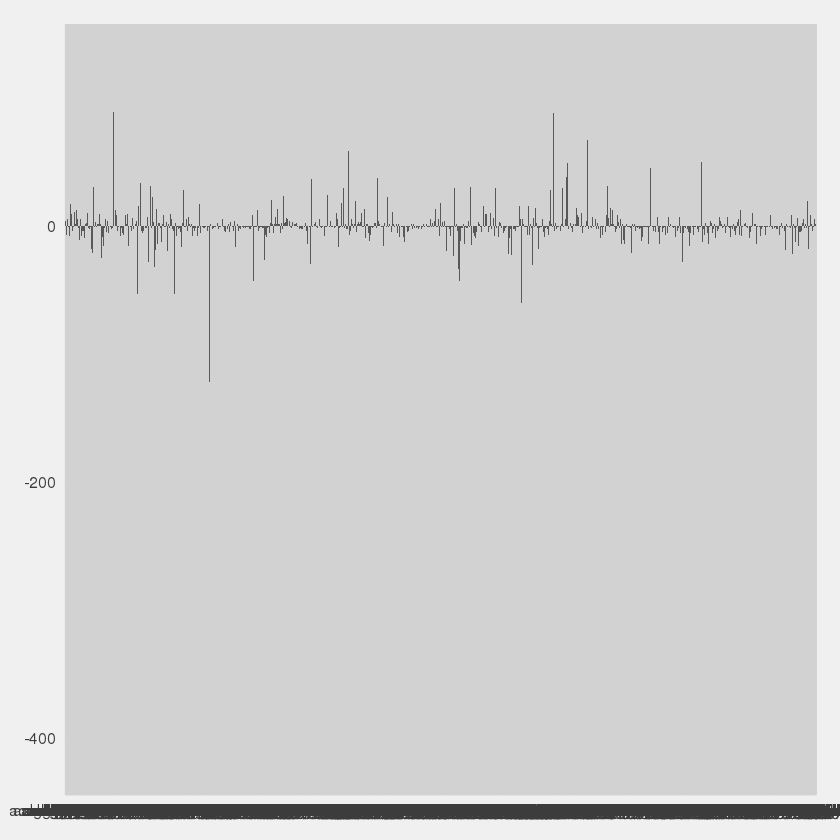

In [28]:
ggplot(sentiment2, aes(index, sentiment)) +
geom_col(show.legend = FALSE) +
xlab(NULL) +
theme_fivethirtyeight()

Now I want to look at the number of positive and negative terms using each lexicon.

In [29]:
exp_word_counts_n <- exp_sent %>%
inner_join(get_sentiments("nrc")) %>%
count(word, sentiment, sort = TRUE) %>%
ungroup()
exp_word_counts_n

Joining, by = "word"


genre,word,sentiment,n
experimental,noise,negative,417
experimental,sense,positive,313
experimental,musical,anger,231
experimental,musical,anticipation,231
experimental,musical,joy,231
experimental,musical,positive,231
experimental,musical,sadness,231
experimental,musical,surprise,231
experimental,musical,trust,231
experimental,title,positive,217


Selecting by n


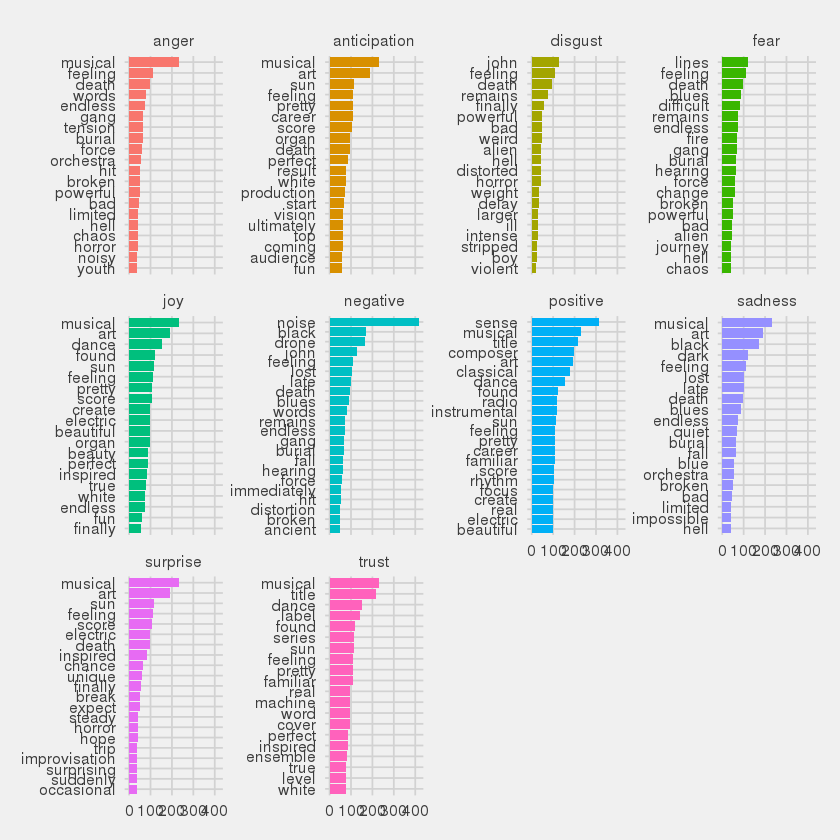

In [30]:
exp_word_counts_n %>%
group_by(sentiment) %>%
top_n(20) %>%
ungroup() %>%
mutate(word = reorder(word, n)) %>%
ggplot(aes(word, n, fill = sentiment)) +
geom_col(show.legend = FALSE) +
facet_wrap(~sentiment, scales = "free_y") +
labs(y = "Positive vs. Negative",
     x = NULL) +
coord_flip() +
theme_fivethirtyeight()

In [31]:
exp_word_counts_b <- exp_sent %>%
inner_join(get_sentiments("bing")) %>%
count(word, sentiment, sort = TRUE) %>%
ungroup()
exp_word_counts_b

Joining, by = "word"


genre,word,sentiment,n
experimental,noise,negative,417
experimental,hard,negative,187
experimental,slow,negative,134
experimental,free,positive,130
experimental,dark,negative,122
experimental,drones,negative,121
experimental,easy,positive,116
experimental,instrumental,positive,116
experimental,pretty,positive,108
experimental,slowly,negative,108


Selecting by n


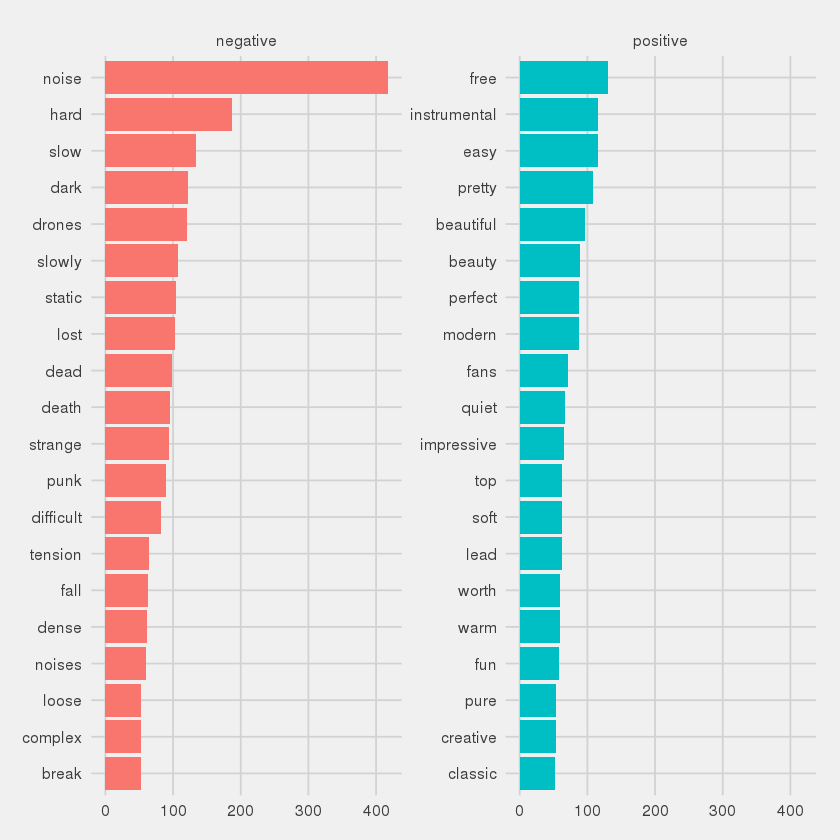

In [32]:
exp_word_counts_b %>%
group_by(sentiment) %>%
top_n(20) %>%
ungroup() %>%
mutate(word = reorder(word, n)) %>%
ggplot(aes(word, n, fill = sentiment)) +
geom_col(show.legend = FALSE) +
facet_wrap(~sentiment, scales = "free_y") +
labs(y = "Positive vs. Negative",
     x = NULL) +
coord_flip() +
theme_fivethirtyeight()

Here's another way to look at the proportion of positive and negative words. First a wordcloud displaying all words. Followed by a comparison cloud, splitting the negative and positive words used.

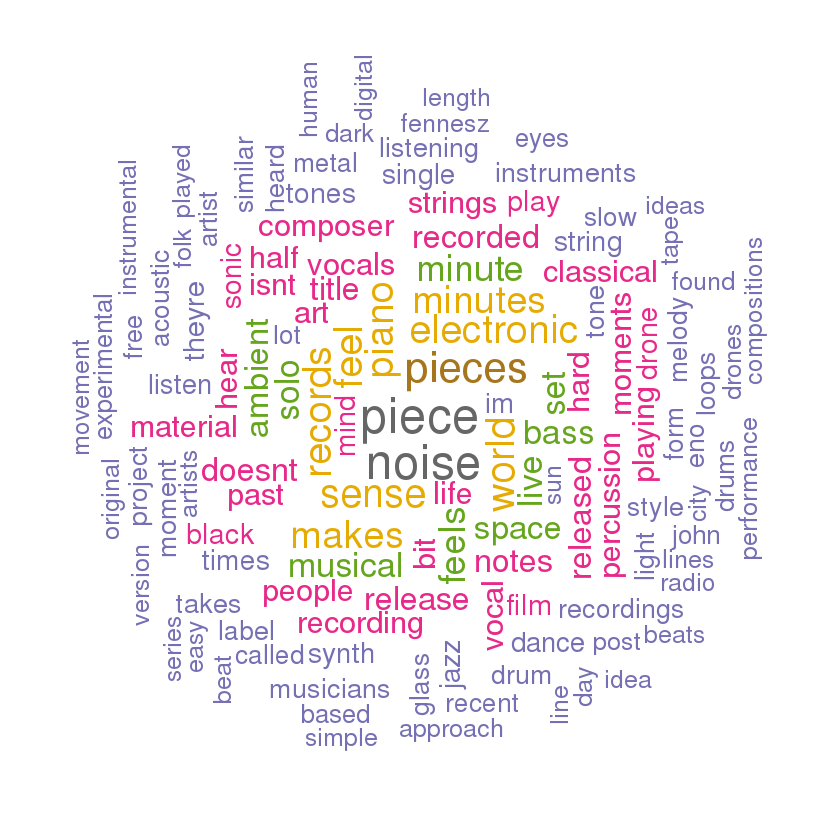

In [33]:
exp_sent %>%
count(word) %>%
with(wordcloud(word, n, max.words =125,min.freq=3,scale=c(2.5,.8), 
           random.order = FALSE,rot.per=.5,colors=brewer.pal(8, "Dark2")))


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Joining, by = "word"


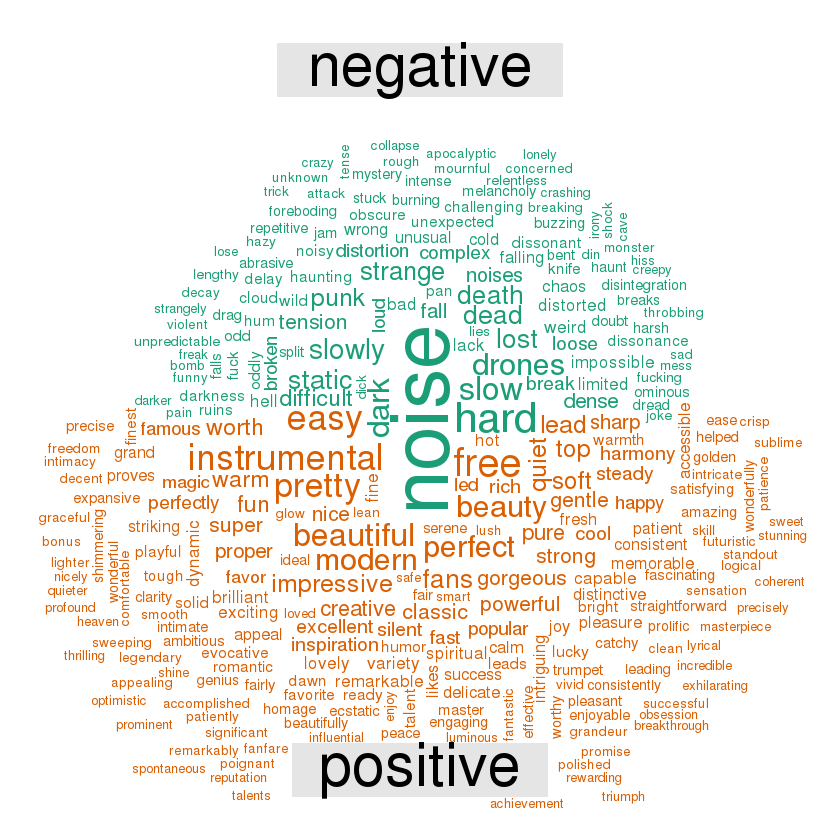

In [34]:
library(reshape2)
exp_sent %>%
inner_join(get_sentiments("bing")) %>%
count(word, sentiment, sort = TRUE) %>%
acast(word ~ sentiment, value.var = "n", fill = 0) %>%
comparison.cloud(colors=brewer.pal(8, "Dark2"))

In [35]:
glimpse(pitchfork)

Observations: 18,388
Variables: 19
$ reviewid       <int> 22703, 22721, 22659, 22661, 22725, 22722, 22704, 226...
$ Unnamed..0     <int> 0, 1, 2, 4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19...
$ title          <chr> "mezzanine", "prelapsarian", "all of them naturals",...
$ url            <chr> "http://pitchfork.com/reviews/albums/22703-mezzanine...
$ score          <chr> "9.3", "7.9", "7.3", "9", "8.1", "7.4", "7.1", "7", ...
$ best_new_music <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...
$ author         <chr> "nate patrin", "zoe camp", "david glickman", "jenn p...
$ author_type    <chr> "contributor", "contributor", "contributor", "associ...
$ pub_date       <chr> "2017-01-08", "2017-01-07", "2017-01-07", "2017-01-0...
$ pub_weekday    <chr> "6", "5", "5", "4", "4", "3", "3", "3", "2", "2", "2...
$ pub_day        <int> 8, 7, 7, 6, 6, 5, 5, 5, 4, 4, 4, 3, 3, 2, 2, 2, 2, 3...
$ pub_month      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
$ pub_year       

Afer looking at all of this, I became curious to see how words in the review are possibly related. I did some reading on tokenizing by ngram and looking at bigrams. Here's my attempt to find any relation between words.

In [36]:
exp_bigrams <- pitchfork %>%
group_by(genre) %>%
filter(genre == "experimental") %>%
unnest_tokens(bigram, content, token = "ngrams", n = 2)

In [37]:
glimpse(exp_bigrams)

Observations: 371,381
Variables: 19
$ reviewid       <int> 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, ...
$ Unnamed..0     <int> 24328, 24328, 24328, 24328, 24328, 24328, 24328, 243...
$ title          <chr> "loud like nature", "loud like nature", "loud like n...
$ url            <chr> "http://pitchfork.com/reviews/albums/50-loud-like-na...
$ score          <chr> "6.8", "6.8", "6.8", "6.8", "6.8", "6.8", "6.8", "6....
$ best_new_music <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ author         <chr> "mark richardson", "mark richardson", "mark richards...
$ author_type    <chr> "executive editor", "executive editor", "executive e...
$ pub_date       <chr> "2002-11-21", "2002-11-21", "2002-11-21", "2002-11-2...
$ pub_weekday    <chr> "3", "3", "3", "3", "3", "3", "3", "3", "3", "3", "3...
$ pub_day        <int> 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, ...
$ pub_month      <int> 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, ...
$ pub_year      

In [38]:
exp_bigrams %>%
count(bigram, sort = TRUE)

bigram,n
of the,2086
in the,1333
to the,812
on the,780
and the,779
of a,658
in a,620
is a,555
as a,547
with the,523


Looks like many of the common bigrams are stop words used in conjunction. I'll need to remove those.

In [39]:
exp_bigrams_sep <- exp_bigrams %>%
separate(bigram, c("word1", "word2"), sep = " ")

exp_bigrams_filt <- exp_bigrams_sep %>%
filter(!word1 %in% stop_words$word) %>%
filter(!word2 %in% stop_words$word)

exp_bigram_counts <- exp_bigrams_filt %>%
count(word1, word2, sort = TRUE)

In [40]:
head(exp_bigram_counts)

word1,word2,n
electronic,music,83
title,track,71
wolf,eyes,63
avant,garde,51
electric,guitar,41
liner,notes,39


After splitting the bigrams in two in order to remove the stop words, I now need to put them back together again.

In [41]:
exp_bigrams_united <- exp_bigrams_filt %>%
unite(bigram, word1, word2, sep = " ")

In [42]:
head(exp_bigrams_united)

reviewid,Unnamed..0,title,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid.1,genre,label,artist,X,bigram
50,24328,loud like nature,http://pitchfork.com/reviews/albums/50-loud-like-nature/,6.8,0,mark richardson,executive editor,2002-11-21,3,21,11,2002,50,experimental,mute,add n to (x),,avoiding categories
50,24328,loud like nature,http://pitchfork.com/reviews/albums/50-loud-like-nature/,6.8,0,mark richardson,executive editor,2002-11-21,3,21,11,2002,50,experimental,mute,add n to (x),,virtue praised
50,24328,loud like nature,http://pitchfork.com/reviews/albums/50-loud-like-nature/,6.8,0,mark richardson,executive editor,2002-11-21,3,21,11,2002,50,experimental,mute,add n to (x),,record featuring
50,24328,loud like nature,http://pitchfork.com/reviews/albums/50-loud-like-nature/,6.8,0,mark richardson,executive editor,2002-11-21,3,21,11,2002,50,experimental,mute,add n to (x),,kitschy photograph
50,24328,loud like nature,http://pitchfork.com/reviews/albums/50-loud-like-nature/,6.8,0,mark richardson,executive editor,2002-11-21,3,21,11,2002,50,experimental,mute,add n to (x),,vintage moog
50,24328,loud like nature,http://pitchfork.com/reviews/albums/50-loud-like-nature/,6.8,0,mark richardson,executive editor,2002-11-21,3,21,11,2002,50,experimental,mute,add n to (x),,human stomach


In [43]:
exp_bigram_tf_idf <- exp_bigrams_united %>%
count(artist, bigram) %>%
bind_tf_idf(bigram, artist, n) %>%
arrange(desc(tf_idf))

In [44]:
head(exp_bigram_tf_idf)

artist,bigram,n,tf,idf,tf_idf
slow six,private times,7,0.08333333,5.63479,0.4695658
simon wickham-smith,wickham smith,10,0.05524862,5.63479,0.3113143
mario diaz de leon,diaz de,9,0.05294118,5.63479,0.2983124
"laraaji, sun araw",professional sunflow,5,0.05102041,5.63479,0.2874893
"fennesz, polwechsel",wrapped islands,5,0.04629630,5.63479,0.2608699
"glenn kotche, so percussion",drumkit quartet,5,0.04629630,5.63479,0.2608699


Here's what I've determined after trying a number of variables, many of the bigrams with the highest scores tend to be band or artist names. I guess I should have anticipated this. I decided to try a couple of other ways to visualize any connections between words.

In [46]:
library(igraph)

bigram_graph <- exp_bigram_counts %>%
filter(n > 15) %>%
graph_from_data_frame()

In [47]:
head(bigram_graph)

   [[ suppressing 101 column names 'electronic', 'title', 'wolf' ... ]]


6 x 101 sparse Matrix of class "dgCMatrix"
                                                                              
electronic . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
title      . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
wolf       . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
avant      . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
electric   . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
liner      . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                                                                              
electronic . . . . . . . . . . . . . . . . . . . . . . 1 . . . . . . . . . . .
title      . . . . . . . . . . . . . . . . . . . . . . . 1 . . . . . . . . . .
wolf       . . . . . . . . . . . . . . . . . . . . . . . . 1 . . . . . . . . .
avant      . . . . . . . . . . . . . . . . . . . . . . . . . 1 . . . . . . . .
electric 

In [48]:
glimpse(bigram_graph)

IGRAPH DN-- 101 61 -- 
+ attr: name (v/c), n (e/n)
+ edges (vertex names):
 [1] electronic    ->music           title         ->track          
 [3] wolf          ->eyes            avant         ->garde          
 [5] electric      ->guitar          liner         ->notes          
 [7] ambient       ->music           classical     ->music          
 [9] endless       ->summer          free          ->jazz           
[11] source        ->material        solo          ->album          
[13] acoustic      ->guitar          brian         ->eno            
[15] gang          ->gang            philip        ->glass          
[17] post          ->rock            field         ->recordings     
[19] arthur        ->russell         black         ->dice           
[21] drum          ->machine         super         ->roots          
[23] experimental  ->music           steve         ->reich          
[25] white         ->noise           sun           ->araw           
[27] 20th          ->century

Warning message in max(E(bigram_graph)$cnt):
"no non-missing arguments to max; returning -Inf"

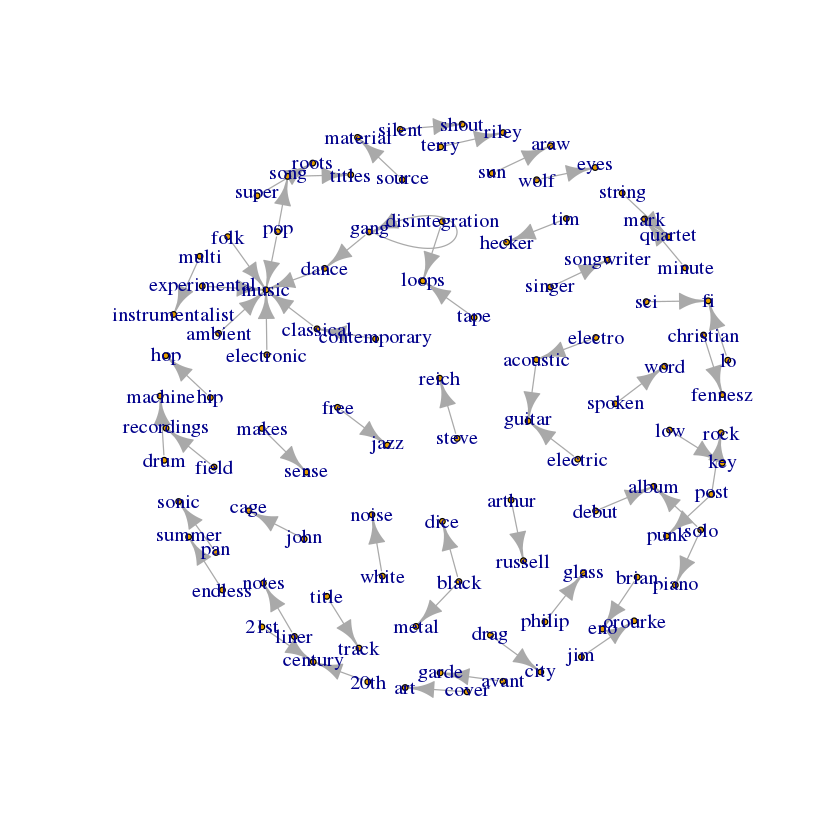

In [49]:
E(bigram_graph)$cnt <- E(bigram_graph)$cnt/max(E(bigram_graph)$cnt)

plot(bigram_graph, vertex.size=2, layout=layout.kamada.kawai, edge.width=E(bigram_graph)$cnt)

In [51]:
png(filename="bigram_network.png")

E(bigram_graph)$cnt <- E(bigram_graph)$cnt/max(E(bigram_graph)$cnt)

plot(bigram_graph, vertex.size=2, layout=layout.kamada.kawai, edge.width=E(bigram_graph)$cnt)

dev.off()

Warning message in max(E(bigram_graph)$cnt):
"no non-missing arguments to max; returning -Inf"

png 
  2

In [50]:
library(networkD3)

b3 <- igraph_to_networkD3(bigram_graph)

forceNetwork(Links = b3$links, Nodes = b3$nodes, Source = 'source', Target = 'target', 
             NodeID = 'name', Group = 'name', height=500, zoom=TRUE)

HTML widgets cannot be represented in plain text (need html)

And in the spirit of experimentation, I sonified the top 20 words used in the experimental genre reviews and created a piece. I've uploaded the results here: DSA-8630_craddocka/modules/module8/audio_files/t0p_20_2.wav

I used a program I found called jython environment for music. It utilizes the jython language:


In [ ]:
from music import *
from random import *
 
# Define text to sonify.
 
text = """piece noise pieces world sense piano feel records electronic makes minutes feels minute musical live solo bass set ambient space"""
 
##### define the data structure
textMusicScore  = Score("Top 20 words", 110)
textMusicPart   = Part("Top 20 words", 30, 0)
textMusicPhrase = Phrase()
 
# create durations list (factors correspond to probability)
durations = [HN] + [QN]*4 + [EN]*4 + [SN]*2
 
##### create musical data
for character in text:  # loop enough times
 
   value = ord(character)         # convert character to ASCII number
 
   # map printable ASCII values to a pitch value
   pitch = mapScale(value, 0, 126, C3, C6, PENTATONIC_SCALE, C2)
 
   # map printable ASCII values to a duration value
   index = mapValue(value, 32, 126, 0, len(durations)-1)
   duration = durations[index]
 
   print "value", value, "becomes pitch", pitch,
   print "and duration", duration
 
   dynamic = randint(60, 120)    # get a random dynamic
 
   note = Note(pitch, duration, dynamic)   # create note
   textMusicPhrase.addNote(note)  # and add it to phrase
 
# now, all characters have been converted to notes   
 
# add ending note (same as last one - only longer)
note = Note(pitch, WN)
textMusicPhrase.addNote(note)   
 
##### combine musical material
textMusicPart.addPhrase(textMusicPhrase)
textMusicScore.addPart(textMusicPart)
 
##### view score and write it to a MIDI file
View.show(textMusicScore)
Play.midi(textMusicScore)
Write.midi(textMusicScore, "t0p_20.mid")


I made one other. This same program is able to sonify pixel data, so I used the bigram igraph image from above to make this one: DSA-8630_craddocka/modules/module8/audio_files/bigram_network_2.wav

In [ ]:
from music import *
from image import *
from random import *
 
##### define data structure
soundscapeScore = Score("bigram_network", 60)
soundscapePart  = Part(PIANO, 0) 
 
##### define  musical parameters
scale = MIXOLYDIAN_SCALE
 
minPitch = 0        # MIDI pitch (0-127)
maxPitch = 127
 
minDuration = 0.8   # duration (1.0 is QN)
maxDuration = 6.0
 
minVolume = 0       # MIDI velocity (0-127)
maxVolume = 127
 
# start time is randomly displaced by one of these
# durations (for variety)
timeDisplacement = [DEN, EN, SN, TN]
 
##### read in image (origin (0, 0) is at top left)
image = Image("bigram_network.png")
 
# specify image pixel rows to sonify - this depends on the image!
pixelRows = [0, 53, 106, 159, 212]
width = image.getWidth()     # get number of columns in image
height = image.getHeight()   # get number of rows in image
 
##### define function to sonify one pixel
# Returns a note from sonifying the RGB values of 'pixel'.
def sonifyPixel(pixel):
 
   red, green, blue = pixel  # get pixel RGB value
 
   luminosity = (red + green + blue) / 3   # calculate brightness
 
   # map luminosity to pitch (the brighter the pixel, the higher
   # the pitch) using specified scale
   pitch = mapScale(luminosity, 0, 255, minPitch, maxPitch, scale)
 
   # map red value to duration (the redder the pixel, the longer
   # the note)
   duration = mapValue(red, 0, 255, minDuration, maxDuration)
 
   # map blue value to dynamic (the bluer the pixel, the louder
   # the note)
   dynamic = mapValue(blue, 0, 255, minVolume, maxVolume)
 
   # create note and return it to caller
   note = Note(pitch, duration, dynamic)   
 
   # done sonifying this pixel, so return result
   return note
 
##### create musical data
 
# sonify image pixels
for row in pixelRows:   # iterate through selected rows
 
   for col in range(width):  # iterate through all pixels on this row
 
      # get pixel at current coordinates (col and row)
      pixel = image.getPixel(col, row)
 
      # sonify this pixel (we get a note)
      note = sonifyPixel(pixel)
 
      # wrap note in a phrase to give it a start time
      # (Phrases have start time, Notes do not)
 
      # use column value as note start time (e.g., 0.0, 1.0, and so on)
      startTime = float(col)   # phrase start time is a float
 
      # add some random displacement for variety
      startTime = startTime + choice( timeDisplacement )
 
      phrase = Phrase(startTime)   # create phrase with given start time
      phrase.addNote(note)         # and put the note in it 
 
      # put result in part
      soundscapePart.addPhrase(phrase)
 
   # now, all pixels on this row have been sonified
 
# now, all pixelRows have been sonified, and soundscapePart
# contains all notes
 
##### combine musical material
soundscapeScore.addPart(soundscapePart)
 
##### view score and write it to an audio and MIDI files
View.sketch(soundscapeScore)
Write.midi(soundscapeScore, "bigram_network.mid")
